In [5]:
#importing the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
#loading data
ipl=pd.read_csv("matches.csv")
del_df = pd.read_csv('deliveries.csv')

In [26]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
ipl.shape

(756, 18)

**Number of Matches played in each Season**

Text(0.5, 1.0, 'Number of Matches  vs  Season')

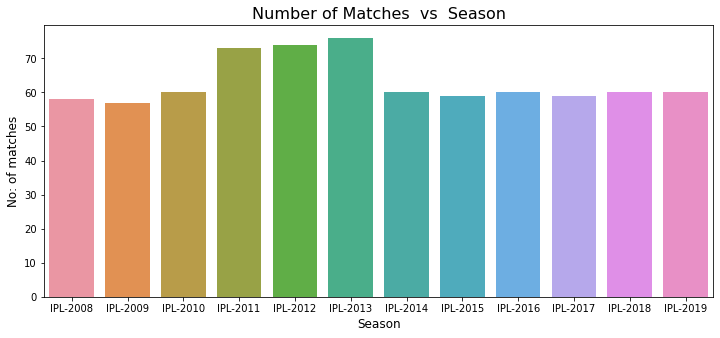

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x=ipl['Season'],order=ipl['Season'].value_counts().index.sort_values())
plt.xlabel('Season',fontsize=12)
plt.ylabel('No: of matches',fontsize=12)
plt.title('Number of Matches  vs  Season',fontsize=16)

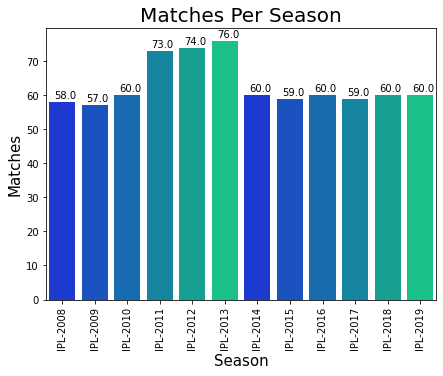

In [18]:
matches_per_season=ipl.groupby('Season')['id'].count().reset_index()
plt.figure(figsize=(7,5))
season_plot=sns.barplot(x='Season',y='id',data=matches_per_season,palette=sns.color_palette('winter'))
plt.xticks(rotation=90)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Matches',fontsize=15)

plt.title('Matches Per Season',size=20)
for p in season_plot.patches:
    season_plot.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

**Number of matches won by the teams**

Text(0.5, 1.0, 'Number of Matches won  vs  Teams')

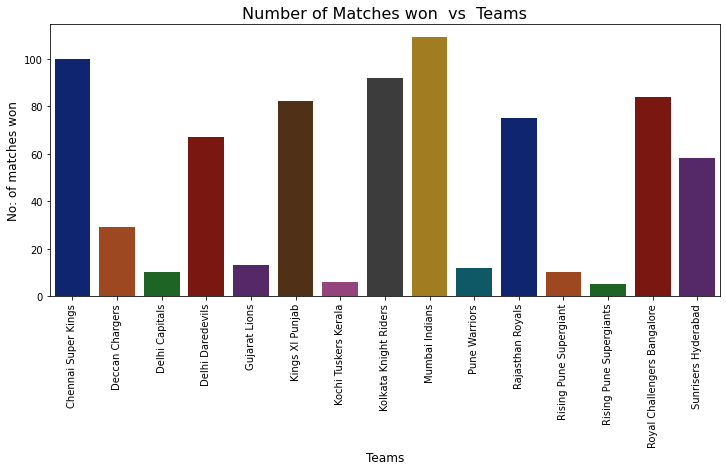

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x=ipl['winner'],order=ipl['winner'].value_counts().index.sort_values(),palette='dark')
plt.xticks(rotation='vertical')
plt.xlabel('Teams',fontsize=12)
plt.ylabel('No: of matches won',fontsize=12)
plt.title('Number of Matches won  vs  Teams',fontsize=16)



*   MI wons maximum number of matches including all the seasons




**Toss_Decision**

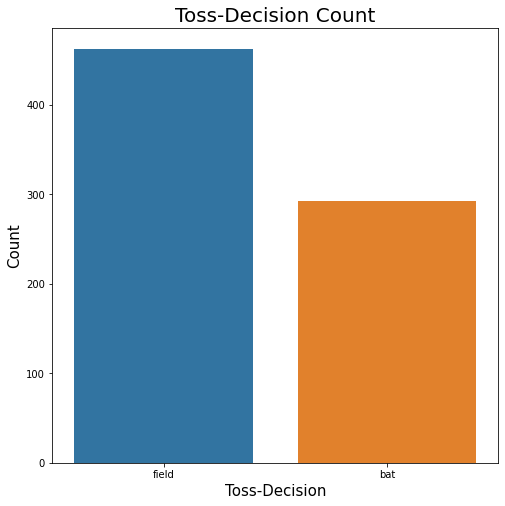

In [10]:
toss_decisions=ipl['toss_decision'].value_counts().reset_index()
plt.figure(figsize=(8,8))
sns.barplot(x='index',y='toss_decision',data=toss_decisions)
plt.xlabel('Toss-Decision',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Toss-Decision Count',size=20)
plt.show()

([<matplotlib.patches.Wedge at 0x7f37abd57550>,
 [Text(-0.3805142883934777, 1.032089567977705, 'field'),
  Text(0.3805142883934778, -1.032089567977705, 'bat')],
 [Text(-0.20755324821462415, 0.5629579461696571, '61.24%'),
  Text(0.20755324821462423, -0.5629579461696571, '38.76%')])

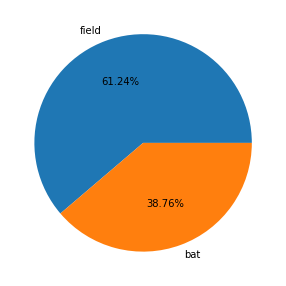

In [94]:
plt.figure(figsize=(12,5))
plt.pie(ipl['toss_decision'].value_counts(),
        labels=ipl['toss_decision'].value_counts().index,autopct='%1.2f%%')

*   61.24% times teams choses field after winning the toss




**Toss Win Counts**

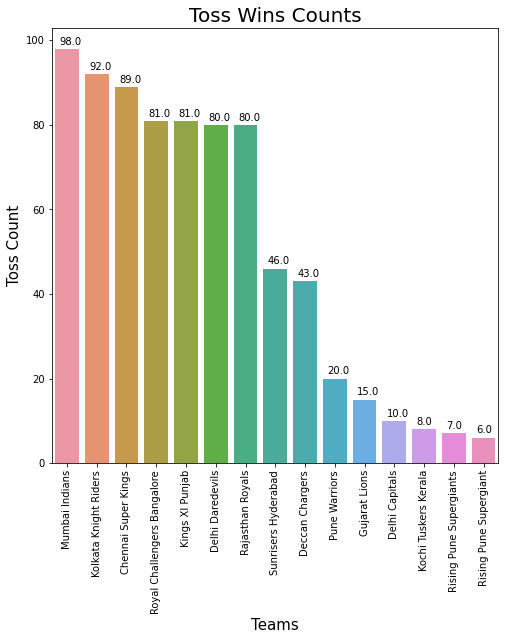

In [11]:
toss_wins_per_team=ipl['toss_winner'].value_counts().reset_index()
plt.figure(figsize=(8,8))
toss_plot=sns.barplot(x='index',y='toss_winner',data=toss_wins_per_team)
plt.xticks(rotation=90)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Toss Count',fontsize=15)

plt.title('Toss Wins Counts',size=20)
for p in toss_plot.patches:
    toss_plot.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

**Matches Per Venue**

Text(0.5, 1.0, 'Number of Matches Played vs  Stadiums')

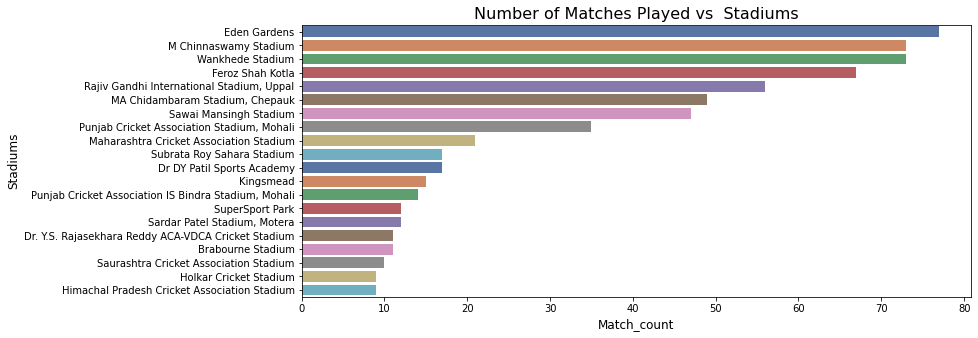

In [99]:
plt.figure(figsize=(12,5))
sns.countplot(y=ipl['venue'],order=ipl['venue'].value_counts().index[0:20],palette='deep')
plt.xlabel('Match_count',fontsize=12)
plt.ylabel('Stadiums',fontsize=12)
plt.title('Number of Matches Played vs  Stadiums',fontsize=16)



*   Most of the matches played in Eden Gardens and chinnaswamy, wankhede stadium




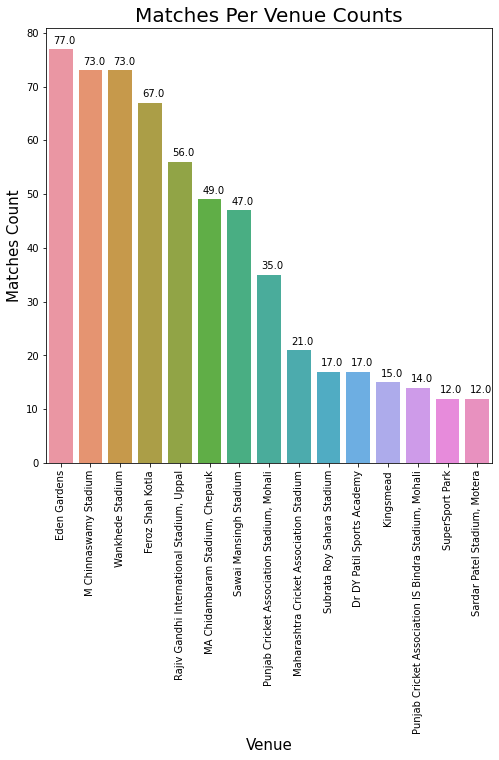

In [13]:
matches_per_venue=ipl['venue'].value_counts().reset_index()
plt.figure(figsize=(8,8))
venue_plot=sns.barplot(x='index',y='venue',data=matches_per_venue[:15])
plt.xticks(rotation=90)
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Matches Count',fontsize=15)

plt.title('Matches Per Venue Counts',size=20)
for p in venue_plot.patches:
    venue_plot.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

**Runs Distribution Per Season**

In [23]:
runs=ipl[['id','Season']].merge(del_df,left_on='id',right_on='match_id',how='left').drop('id',axis=1)

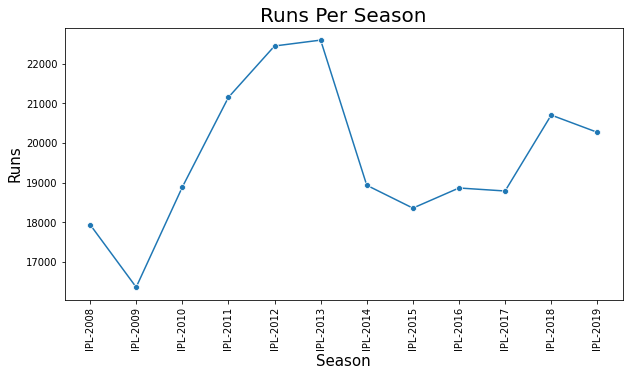

In [25]:
runs_per_season=runs.groupby('Season')['total_runs'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(x='Season',y='total_runs',data=runs_per_season,marker="o")
plt.xticks(rotation=90)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Runs',fontsize=15)

plt.title('Runs Per Season',size=20)

plt.show()

**Bat first and Ball first wins comparison per venue**

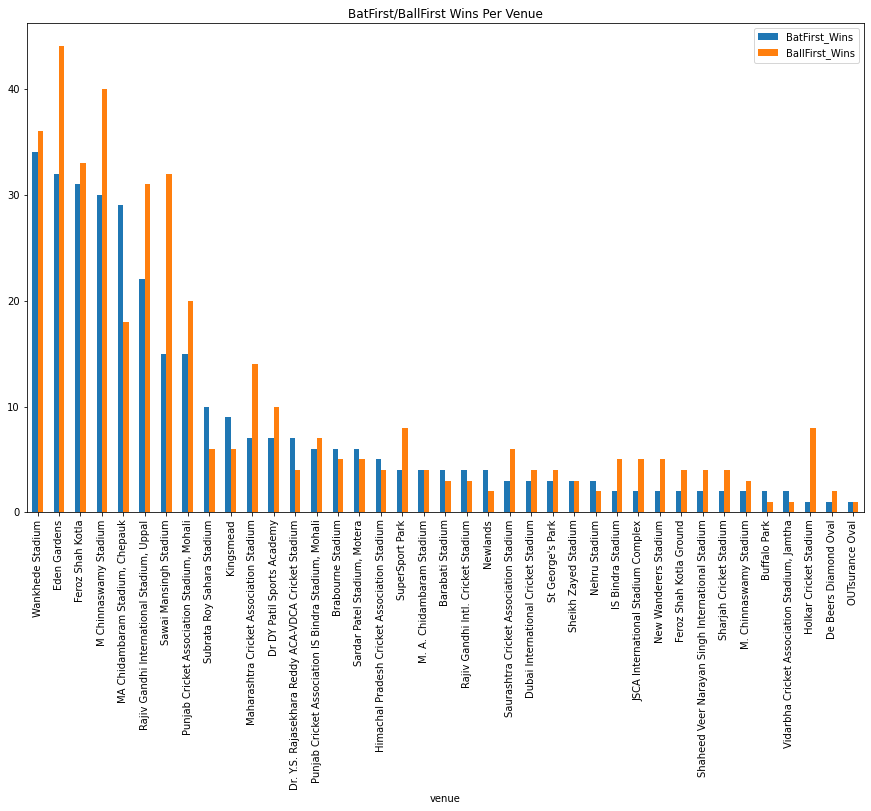

In [14]:
batfirst_wins=ipl[ipl.win_by_runs>1].groupby('venue').apply(lambda x:x['win_by_runs'].count()).reset_index(name='BatFirst_Wins')
ballfirst_wins=ipl[ipl.win_by_wickets>1].groupby('venue').apply(lambda x:x['win_by_wickets'].count()).reset_index(name='BallFirst_Wins')
Innings_venue=batfirst_wins.merge(ballfirst_wins,on='venue').sort_values(['BatFirst_Wins','BallFirst_Wins'],ascending=False)
Innings_venue.plot.bar(x='venue',y=['BatFirst_Wins','BallFirst_Wins'],rot=90,figsize=(15,9),title='BatFirst/BallFirst Wins Per Venue')
plt.show()

**Toss And Match wins comparison per team**

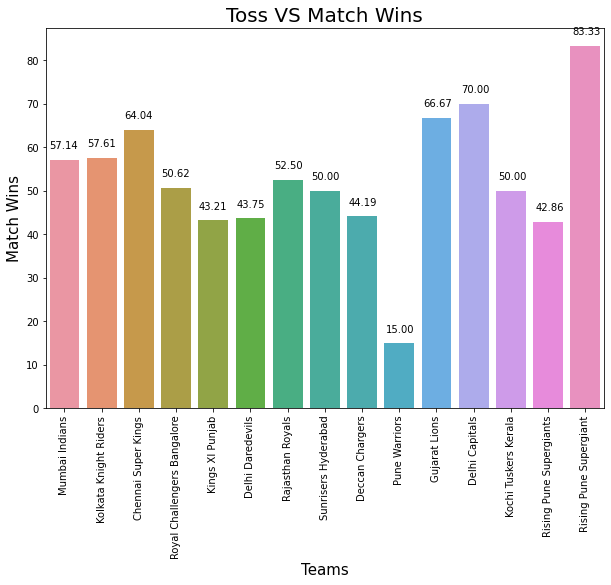

In [15]:
toss_match_wins_per_team=ipl[ipl.toss_winner==ipl.winner].groupby('winner').apply(lambda x:x['winner'].count()).reset_index(name='Toss_Match_Wins')
toss_wins_per_team=ipl['toss_winner'].value_counts().reset_index(name='toss_wins')
toss_wins_per_team.rename(columns={'index':'winner'},inplace=True)
toss_match_win=toss_wins_per_team.merge(toss_match_wins_per_team,on='winner')
toss_match_win['Percetage']=(toss_match_win.Toss_Match_Wins/toss_match_win.toss_wins)*100
plt.figure(figsize=(10,7))
toss_mat_plot=sns.barplot(x='winner',y='Percetage',data=toss_match_win)
plt.xticks(rotation=90)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Match Wins',fontsize=15)

plt.title('Toss VS Match Wins',size=20)
for p in toss_mat_plot.patches:
    toss_mat_plot.annotate("%.2f" % p.get_height(), (p.get_x()*1.005, p.get_height()*1.005),  xytext=(0, 10), textcoords='offset points')

**Batting_first**

In [101]:
batting_first=ipl[ipl['win_by_runs']!=0]
batting_first['winner'].value_counts()[0:5]
ipl[ipl['win_by_runs']!=0]['winner'].value_counts().index[0:5]

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore'],
      dtype='object')

Text(0.5, 1.0, 'Teams vs won_during_bat_first')

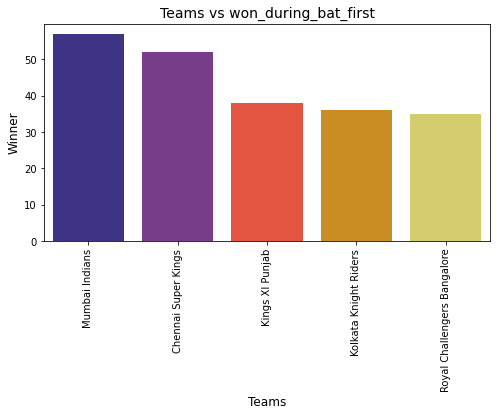

In [100]:
plt.figure(figsize=(8,4))
sns.barplot(x=ipl[ipl['win_by_runs']!=0]['winner'].value_counts().index[0:5],
                                    y=batting_first['winner'].value_counts()[0:5],palette='CMRmap')

plt.xticks(rotation='vertical')
plt.xlabel('Teams',fontsize=12)
plt.ylabel('Winner',fontsize=12)
plt.title('Teams vs won_during_bat_first',fontsize=14)

* Mumbai Indians won maximum number of matches,when they bat first

**Batting Second**

In [104]:
batting_Second=ipl[ipl['win_by_wickets']!=0]
batting_Second['winner'].value_counts()[0:5]
ipl[ipl['win_by_wickets']!=0]['winner'].value_counts().index[0:5]

Index(['Kolkata Knight Riders', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Chennai Super Kings',
       'Rajasthan Royals'],
      dtype='object')

Text(0.5, 1.0, 'Teams vs won_during_Chasing')

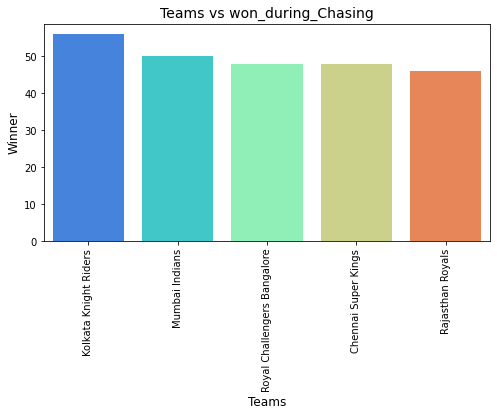

In [105]:
plt.figure(figsize=(8,4))
sns.barplot(x=ipl[ipl['win_by_wickets']!=0]['winner'].value_counts().index[0:5],
                                    y=batting_Second['winner'].value_counts()[0:5],palette='rainbow')

plt.xticks(rotation='vertical')
plt.xlabel('Teams',fontsize=12)
plt.ylabel('Winner',fontsize=12)
plt.title('Teams vs won_during_Chasing',fontsize=14)

**Player of the match**

In [28]:
#checking how many times player got awarded as man of the match
ipl['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [29]:
#top 10 man of the match most time
ipl['player_of_match'].value_counts()[0:10] 

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

Text(0.5, 1.0, 'Player_of_match vs Players')

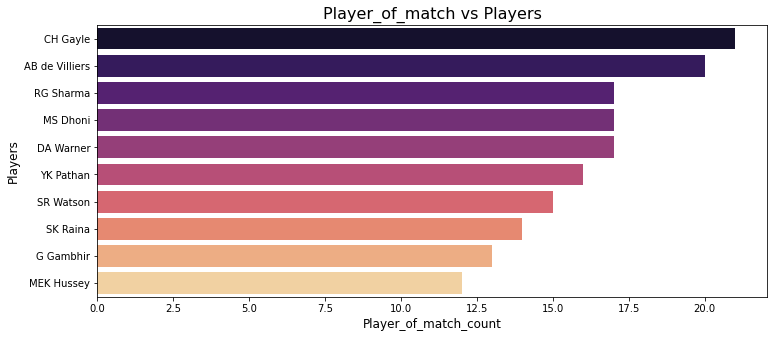

In [106]:
plt.figure(figsize=(12,5))
sns.countplot(y=ipl['player_of_match'],order=ipl['player_of_match'].value_counts().index[0:10],palette='magma')
plt.xlabel('Player_of_match_count',fontsize=12)
plt.ylabel('Players',fontsize=12)
plt.title('Player_of_match vs Players',fontsize=16)

In [30]:
#only names
ipl['player_of_match'].value_counts()[0:5].keys()

Index(['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner'], dtype='object')

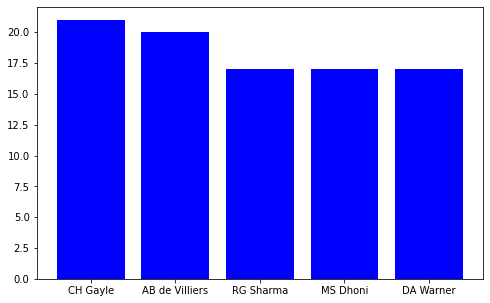

In [31]:
#making a bar plot for the top 5 players with most man of the match awards
plt.figure(figsize=(8,5))
plt.bar(list(ipl['player_of_match'].value_counts()[0:5].keys()),list(ipl['player_of_match'].value_counts()[0:5]),color="b")
plt.show()

In [32]:
# all ipl matched result
ipl['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [21]:
## using isin method to retain rows that are in the list above
#ipl = ipl[ipl['team1'].isin(teams)]
#ipl = ipl[ipl['team2'].isin(teams)]

In [33]:
#toss winner no.
ipl['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [34]:
batting_first=ipl[ipl['win_by_runs']!=0]

In [35]:
batting_first.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


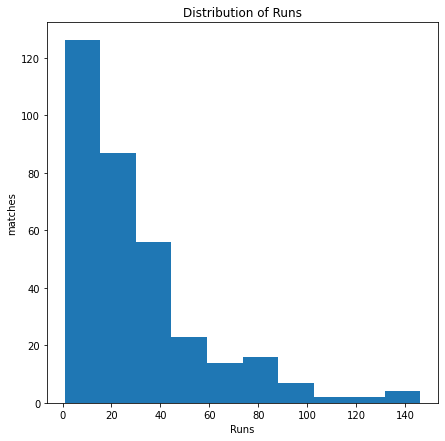

In [36]:
plt.figure(figsize=(7,7))
plt.hist(batting_first['win_by_runs'])
plt.title("Distribution of Runs")
plt.xlabel("Runs")
plt.ylabel("matches")
plt.show()

In [37]:
#founding out the number of wins w.r.t each team after batting first
batting_first["winner"].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

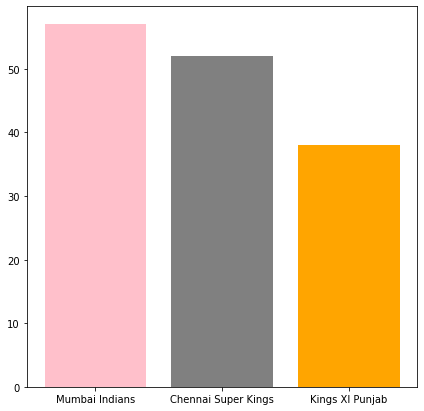

In [38]:
plt.figure(figsize=(7,7))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["pink","grey","orange"])
plt.show()

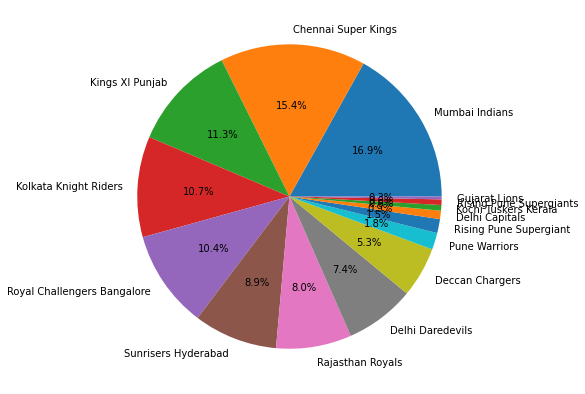

In [39]:
#making pie chart 
plt.figure(figsize=(7,7))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [40]:
batting_second=ipl[ipl['win_by_wickets']!=0]

In [41]:
batting_second.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


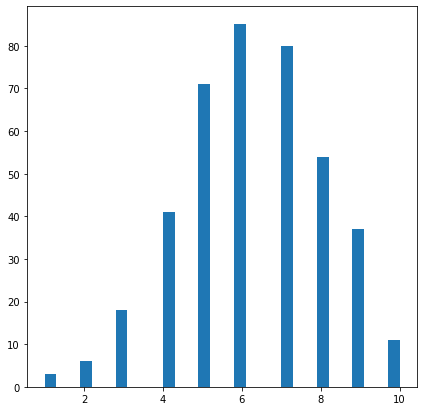

In [42]:
plt.figure(figsize=(7,7))
plt.hist(batting_second["win_by_wickets"],bins=30)
plt.show()

In [43]:
batting_second['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

<BarContainer object of 3 artists>

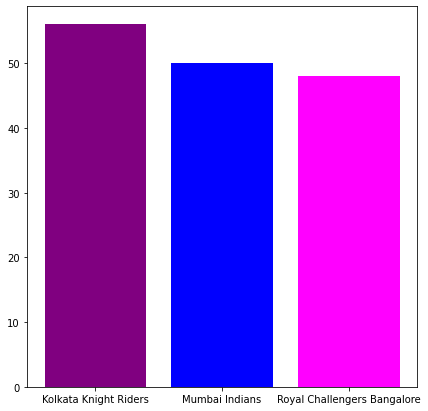

In [45]:
plt.figure(figsize=(7,7))
plt.bar(list(batting_second['winner'].value_counts()[0:3].keys()),list(batting_second['winner'].value_counts()[0:3]),color=["purple","blue","magenta"])

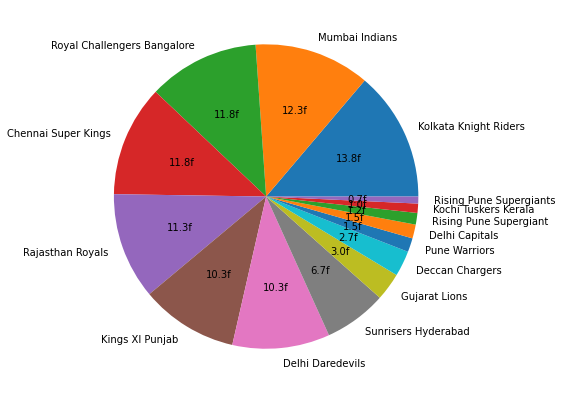

In [46]:
plt.figure(figsize=(7,7))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1ff')
plt.show()

In [47]:
#looking at number of matches played each season 
ipl['Season'].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2010    60
IPL-2014    60
IPL-2016    60
IPL-2018    60
IPL-2019    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [48]:
ipl['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [57]:
#finding how many teams won after winning the toss
import numpy as np
print(np.sum(ipl['toss_winner']==ipl['winner']))

393


In [58]:
393/756

0.5198412698412699

In [64]:
dlvr=pd.read_csv('deliveries.csv')
dlvr.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [74]:
dlvr['match_id'].unique()

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    33,    34,    35,    36,
          37,    38,    39,    40,    41,    42,    43,    44,    45,
          46,    47,    48,    49,    50,    51,    52,    53,    54,
          55,    56,    57,    58,    59,    60,    61,    62,    63,
          64,    65,    66,    67,    68,    69,    70,    71,    72,
          73,    74,    75,    76,    77,    78,    79,    80,    81,
          82,    83,    84,    85,    86,    87,    88,    89,    90,
          91,    92,    93,    94,    95,    96,    97,    98,    99,
         100,   101,   102,   103,   104,   105,   106,   107,   108,
         109,   110,   111,   112,   113,   114,   115,   116,   117,
         118,   119,   120,   121,   122,   123,   124,   125,   126,
         127,   128,

In [76]:
match_1=dlvr[dlvr['match_id']==1]
match_1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [77]:
match_1.shape

(248, 21)

In [78]:
srh=match_1[match_1['inning']==1]

In [79]:
srh['batsman_runs'].value_counts()

1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

In [87]:
np.sum(srh['total_runs'])

207

In [80]:
srh['dismissal_kind'].value_counts()

caught    3
bowled    1
Name: dismissal_kind, dtype: int64

In [81]:
rcb=match_1[match_1['inning']==2]

In [82]:
rcb['batsman_runs'].value_counts()

0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

In [83]:
rcb['dismissal_kind'].value_counts()

caught     6
bowled     2
run out    2
Name: dismissal_kind, dtype: int64

In [88]:
np.sum(rcb['total_runs'])

172

In [90]:
dlvr.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152
